In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, sep=r'\s+', header=None,  names=column_names, na_values='?')

In [18]:
continuous_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df_continuous = df[continuous_cols]
df_filled = df_continuous.fillna(df_continuous.mean())

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filled)

In [20]:
# Hierarchical Cluster
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average' )
cluster_labels = model.fit_predict(scaled_data)

In [21]:
df['Cluster'] = cluster_labels
df_filled['Cluster'] = cluster_labels
df_filled['origin'] = df['origin']  
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,Cluster
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [22]:
print("\nHierarchical Cluster Stats:")
print(df_filled.groupby('Cluster')[continuous_cols].agg(['mean', 'var']))


Hierarchical Cluster Stats:
               mpg            displacement               horsepower  \
              mean        var         mean          var        mean   
Cluster                                                               
0        26.177441  41.303375   144.304714  3511.485383   86.490964   
1        14.528866   4.771033   348.020619  2089.499570  161.804124   
2        43.700000   0.300000    91.750000    12.250000   49.000000   

                          weight                acceleration            
                var         mean            var         mean       var  
Cluster                                                                 
0        295.270673  2598.414141  299118.709664    16.425589  4.875221  
1        674.075816  4143.969072  193847.051117    12.641237  3.189948  
2          4.000000  2133.750000   21672.916667    22.875000  2.309167  


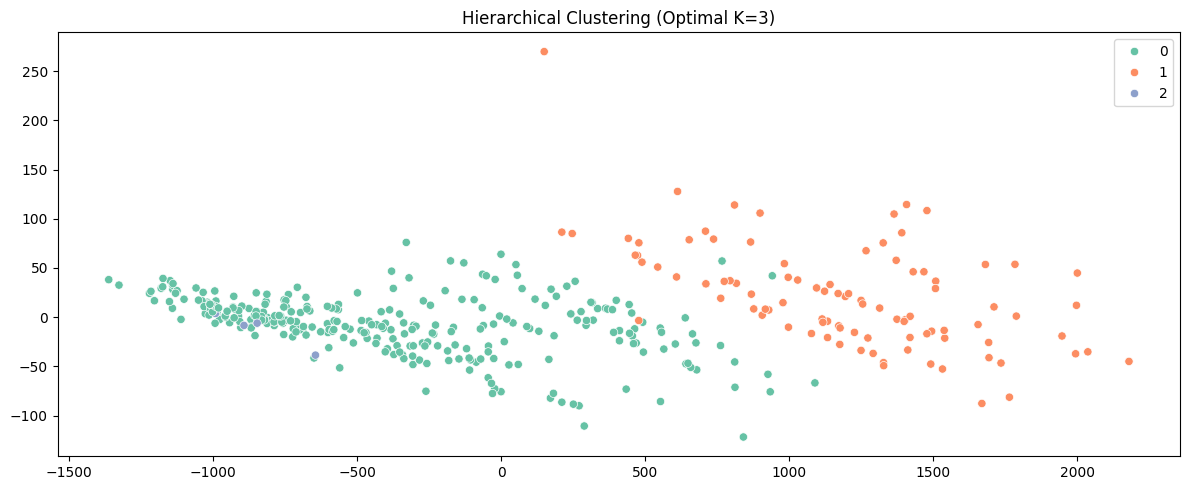

In [23]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_filled)

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=cluster_labels, palette='Set2')
plt.title('Hierarchical Clustering (Optimal K={})'.format(3))
plt.tight_layout()
plt.show()

In [24]:
print("\nHierarchical vs Origin:\n", pd.crosstab(df['origin'], df['Cluster']))


Hierarchical vs Origin:
 Cluster    0   1  2
origin             
1        152  97  0
2         66   0  4
3         79   0  0
